In [20]:
import numpy as np 
import matplotlib.pyplot as plt
import copy

In [21]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [22]:
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


In [23]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [24]:
def predict(x,w,b):
    p = np.dot(x,w) + b
    return p

In [25]:
x_vec = X_train[0,:]
f_wb = predict(x_vec,w_init,b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

f_wb shape (), prediction: 459.99999761940825


In [26]:
def compute_cost(X,y,w,b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb = np.dot(X[i],w)+b
        cost = cost + (f_wb - y[i])**2
    cost = cost/(2*m)
    return cost

In [27]:
cost = compute_cost(X_train,y_train,w_init,b_init)
print(f"Cost at optimal: {cost}")

Cost at optimal: 1.5578904880036537e-12


In [28]:
def compute_gradient(X,y,w,b):
    m,n  = X.shape
    dj_dw = np.zeros((n))
    dj_db = 0.
    for i in range(m):
        f_wb = (np.dot(X[i],w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + f_wb * X[i,j]
        dj_db = dj_db + f_wb 
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw,dj_db

In [29]:
#Computing and displaying the gradient
tmp_dj_db,tmp_dj_dw = compute_gradient(X_train,y_train,w_init,b_init)
print(f"dj_db at initial w,b:{tmp_dj_db}\ndj_dw at initial w,b:{tmp_dj_dw}")

dj_db at initial w,b:[-2.72623581e-03 -6.27197272e-06 -2.21745580e-06 -6.92403399e-05]
dj_dw at initial w,b:-1.673925169143331e-06


In [30]:
def gradient_descent(X, y, w_in, b_in,cost_function,gradient_function,alpha, num_iters): 
    J_hist = list()
    # An array to store cost J and w's at each iteration primarily for graphing later
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw,dj_db = compute_gradient(X,y,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        if i < 100000:
            J_hist.append(compute_cost(X,y,w,b))
        if i % np.ceil(num_iters/10):
            print(f"Iteration {i:4d}: Cost {J_hist[-1]:8.2f}")
    return w,b,J_hist

In [37]:
w_initial = np.zeros_like(w_init)
b_initial = 0.
iters = 1000
alpha = 5.0e-7
w_final,b_final,J_hist = gradient_descent(X_train,y_train,w_initial,b_initial,compute_cost(X_train,y_train,w_initial,b_initial),compute_gradient(X_train,y_train,w_initial,b_initial),alpha,iters)
print("b_final: {:.2f}".format(b_final))
print("w_final:", " ".join(["{:.2f}".format(val) for val in w_final]))
m,_ = X_train.shape
for i in range(m):
    print(f"Prediction: {np.dot(X_train[i],w_final) + b_final:0.2f}, target value :{y_train[i]}")
    

Iteration    1: Cost   765.83
Iteration    2: Cost   699.63
Iteration    3: Cost   697.13
Iteration    4: Cost   697.03
Iteration    5: Cost   697.02
Iteration    6: Cost   697.00
Iteration    7: Cost   696.99
Iteration    8: Cost   696.98
Iteration    9: Cost   696.97
Iteration   10: Cost   696.96
Iteration   11: Cost   696.95
Iteration   12: Cost   696.94
Iteration   13: Cost   696.93
Iteration   14: Cost   696.92
Iteration   15: Cost   696.91
Iteration   16: Cost   696.90
Iteration   17: Cost   696.89
Iteration   18: Cost   696.87
Iteration   19: Cost   696.86
Iteration   20: Cost   696.85
Iteration   21: Cost   696.84
Iteration   22: Cost   696.83
Iteration   23: Cost   696.82
Iteration   24: Cost   696.81
Iteration   25: Cost   696.80
Iteration   26: Cost   696.79
Iteration   27: Cost   696.78
Iteration   28: Cost   696.77
Iteration   29: Cost   696.76
Iteration   30: Cost   696.74
Iteration   31: Cost   696.73
Iteration   32: Cost   696.72
Iteration   33: Cost   696.71
Iteration 

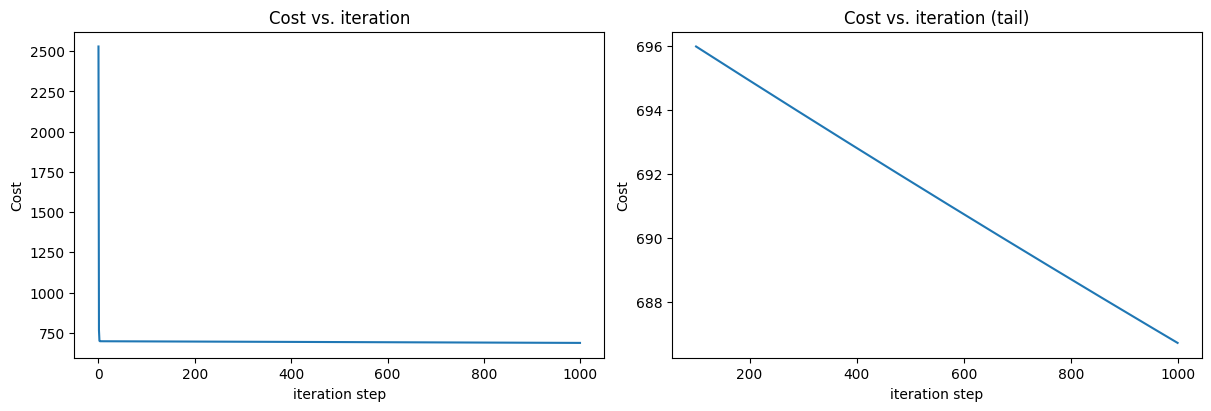

In [39]:
fig,(ax1,ax2) = plt.subplots(1,2,constrained_layout=True,figsize=(12,4))
ax1.plot(J_hist)
ax2.plot(100+np.arange(len(J_hist[100:])),J_hist[100:])
ax1.set_title("Cost vs. iteration") 
ax2.set_title("Cost vs. iteration (tail)") 
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')                
ax1.set_xlabel('iteration step')     
ax2.set_xlabel('iteration step') 
plt.show()